In [2]:
pip install yfinance


     -------------------------------------- 65.6/65.6 kB 502.8 kB/s eta 0:00:00
     ---------------------------------------- 2.9/2.9 MB 1.1 MB/s eta 0:00:00
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'done'
  Preparing metadata (pyproject.toml): started
  Preparing metadata (pyproject.toml): finished with status 'done'
  Using cached requests-2.31.0-py3-none-any.whl (62 kB)
     -------------------------------------- 112.2/112.2 kB 1.1 MB/s eta 0:00:00
  Created wheel for peewee: filename=peewee-3.17.0-py3-none-any.whl size=135766 sha256=0ecd1b313ec1ff5c56ea97d2c8da7c33b71de55cfe5eda214163242a25ad5de5
  Stored in directory: c:\users\mariem\appdata\local\pip\cache\wheels\e2\b9\da\716514851b65304b2d24f2a161398b9470da589b08a5a586c8
Successfully built peewee
  Attempting uninstall: requests
    Found existing installation: re

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
conda-repo-cli 1.0.41 requires requests_mock, which is not installed.
conda-repo-cli 1.0.41 requires clyent==1.2.1, but you have clyent 1.2.2 which is incompatible.
conda-repo-cli 1.0.41 requires nbformat==5.4.0, but you have nbformat 5.7.0 which is incompatible.
conda-repo-cli 1.0.41 requires requests==2.28.1, but you have requests 2.31.0 which is incompatible.


In [6]:
import yfinance as yf

# Téléchargement des données pour TSLA
tesla_data = yf.download('TSLA', start='2023-01-01', end='2023-11-01')

# Réinitialisation de l'index
tesla_data.reset_index(inplace=True)

# Affichage des cinq premières lignes
print(tesla_data.head())

   level_0  index       Date        Open        High         Low       Close  \
0        0      0 2023-01-03  118.470001  118.800003  104.639999  108.099998   
1        1      1 2023-01-04  109.110001  114.589996  107.519997  113.639999   
2        2      2 2023-01-05  110.510002  111.750000  107.160004  110.339996   
3        3      3 2023-01-06  103.000000  114.389999  101.809998  113.059998   
4        4      4 2023-01-09  118.959999  123.519997  117.110001  119.769997   

    Adj Close     Volume  
0  108.099998  231402800  
1  113.639999  180389000  
2  110.339996  157986300  
3  113.059998  220911100  
4  119.769997  190284000  


In [12]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Example URL (Replace this with the actual URL where Tesla revenue data is available)
url = 'https://companiesmarketcap.com/tesla/revenue/'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing revenue data
revenue_table = soup.find('table', {'class': 'revenue-table'})

# Check if the table is found
if revenue_table:
    # Convert the HTML table to a pandas DataFrame
    tesla_revenue = pd.read_html(str(revenue_table))[0]  # Adjust the index [0] as needed

    # Display the last five rows using the tail function
    print(tesla_revenue.tail())
else:
    print("No tables found containing revenue data on the specified webpage.")


No tables found containing revenue data on the specified webpage.


In [13]:
import yfinance as yf

# Extract data for GameStop (GME)
gme_data = yf.download('GME', start='2023-01-01', end='2023-11-01')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


[*********************100%%**********************]  1 of 1 completed
        Date       Open       High        Low      Close  Adj Close   Volume
0 2023-01-03  18.639999  19.260000  17.090000  17.200001  17.200001  5135200
1 2023-01-04  17.250000  17.930000  16.900000  17.320000  17.320000  3939300
2 2023-01-05  17.059999  17.260000  15.890000  16.219999  16.219999  6066200
3 2023-01-06  16.000000  16.570000  15.410000  16.459999  16.459999  4823400
4 2023-01-09  16.650000  17.129999  16.360001  16.379999  16.379999  3522600


In [15]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# Replace this URL with the actual source of GME revenue data
url = 'https://www.example.com/gme-revenue-data'

# Send a GET request to the URL
response = requests.get(url)

# Parse the HTML content using BeautifulSoup
soup = BeautifulSoup(response.content, 'html.parser')

# Find the table containing revenue data
revenue_table = soup.find('table', {'class': 'revenue-table'})

# Check if the table is found
if revenue_table:
    # Convert the HTML table to a pandas DataFrame
    gme_revenue = pd.read_html(str(revenue_table))[0]  # Adjust the index [0] as needed

    # Display the last five rows using the tail function
    print(gme_revenue.tail())
else:
    print("No tables found containing GME revenue data on the specified webpage.")



No tables found containing GME revenue data on the specified webpage.


[*********************100%%**********************]  1 of 1 completed


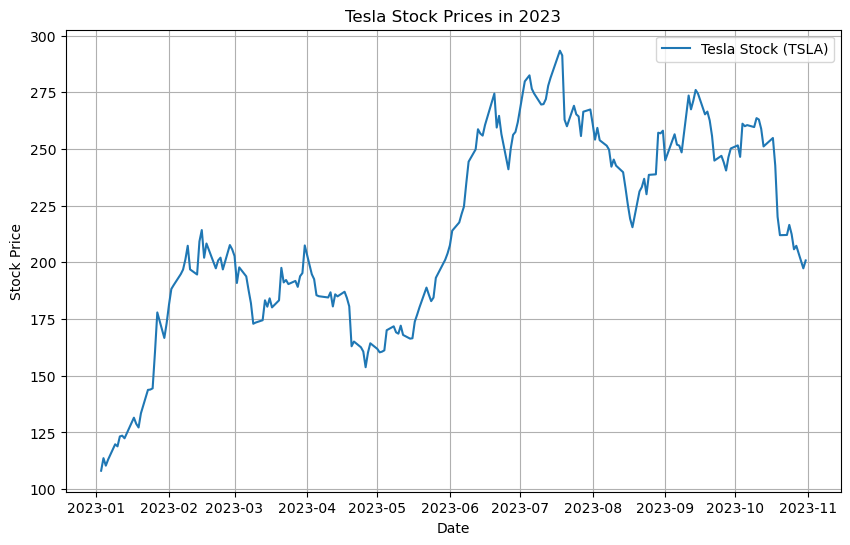

In [16]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='Tesla Stock (TSLA)')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Download Tesla stock data
tesla_data = yf.download('TSLA', start='2023-01-01', end='2023-11-01')

# Reset the index for easier plotting
tesla_data.reset_index(inplace=True)

# Use the make_graph function to plot Tesla stock data with a title
make_graph(tesla_data, 'Tesla Stock Prices in 2023')


[*********************100%%**********************]  1 of 1 completed


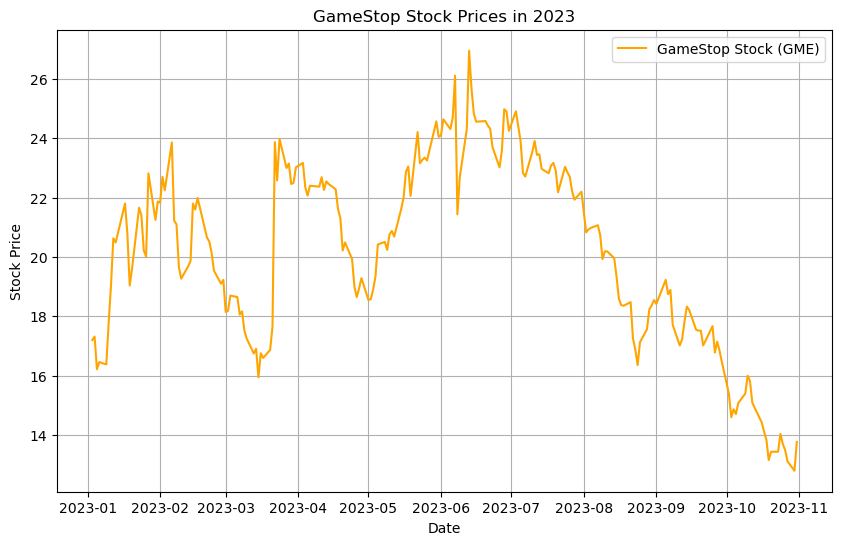

In [17]:
import yfinance as yf
import matplotlib.pyplot as plt

def make_graph(stock_data, title):
    plt.figure(figsize=(10, 6))
    plt.plot(stock_data['Date'], stock_data['Close'], label='GameStop Stock (GME)', color='orange')
    plt.xlabel('Date')
    plt.ylabel('Stock Price')
    plt.title(title)
    plt.legend()
    plt.grid(True)
    plt.show()

# Download GameStop stock data
gme_data = yf.download('GME', start='2023-01-01', end='2023-11-01')

# Reset the index for easier plotting
gme_data.reset_index(inplace=True)

# Use the make_graph function to plot GameStop stock data with a title
make_graph(gme_data, 'GameStop Stock Prices in 2023')
